In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv('/content/twitter_dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      998 non-null    int64 
 1   tweet   998 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [3]:
def clean_tweet(data):
  # Removing special character, number, links, retweet marker, multiple whitespaces, @tag, and hashtag
  data=re.sub(r'RT[\s]','',data)
  data=re.sub(r'http\S','',data)
  data=re.sub(r'www.\S','',data)
  data=re.sub(r'[^a-zA-Z\s]','',data)
  data=re.sub(r'@\w+','',data)
  data=re.sub(r'#\w+','',data)
  data=re.sub(r'\s+',' ',data)
  data=data.strip().lower()
  return data

In [4]:
df['cleaned_tweets']=df['tweet'].apply(clean_tweet)
print(df['cleaned_tweets'])

0      user when a father is dysfunctional and is so ...
1      user user thanks for lyft credit i cant use ca...
2                                    bihday your majesty
3          model i love u take with u all the time in ur
4                      factsguide society now motivation
                             ...                        
993                      glad it all arrived safely user
994    who defines historically oppressed or historic...
995    are you really or just pretending to be truths...
996    i finally found a way how to delete old tweets...
997    user what a view oregon poland usa unitedstate...
Name: cleaned_tweets, Length: 998, dtype: object


In [5]:
df=df[['id','cleaned_tweets']]
print(df)

      id                                     cleaned_tweets
0      1  user when a father is dysfunctional and is so ...
1      2  user user thanks for lyft credit i cant use ca...
2      3                                bihday your majesty
3      4      model i love u take with u all the time in ur
4      5                  factsguide society now motivation
..   ...                                                ...
993  994                    glad it all arrived safely user
994  995  who defines historically oppressed or historic...
995  996  are you really or just pretending to be truths...
996  997  i finally found a way how to delete old tweets...
997  998  user what a view oregon poland usa unitedstate...

[998 rows x 2 columns]


In [6]:
print(df['cleaned_tweets'])

0      user when a father is dysfunctional and is so ...
1      user user thanks for lyft credit i cant use ca...
2                                    bihday your majesty
3          model i love u take with u all the time in ur
4                      factsguide society now motivation
                             ...                        
993                      glad it all arrived safely user
994    who defines historically oppressed or historic...
995    are you really or just pretending to be truths...
996    i finally found a way how to delete old tweets...
997    user what a view oregon poland usa unitedstate...
Name: cleaned_tweets, Length: 998, dtype: object


In [7]:
from google.colab import auth
auth.authenticate_user()

In [8]:
!pip install google-cloud google-cloud-bigquery google-cloud-language langdetect

In [9]:
%env GOOGLE_APPLICATION_CREDENTIALS=/content/smiling-stock-441415-u0-f2a9022360ac.json

env: GOOGLE_APPLICATION_CREDENTIALS=/content/smiling-stock-441415-u0-f2a9022360ac.json


In [10]:
from google.cloud import language_v1
from langdetect import detect


In [18]:
def analyze_sentiment(tweet_text):
    try:
        # Detect language of the tweet
        detected_language = detect(tweet_text)

        # If the language is supported by the Google Natural Language API (e.g., 'en' for English)
        if detected_language == 'en':
            client = language_v1.LanguageServiceClient()
            document = language_v1.Document(content=tweet_text, type_=language_v1.Document.Type.PLAIN_TEXT)
            response = client.analyze_sentiment(request={'document': document})
            sentiment_score = response.document_sentiment.score
            sentiment_magnitude = response.document_sentiment.magnitude
            return sentiment_score, sentiment_magnitude
        # If the language is not supported, return None for both scores
        else:
            return None, None

    except Exception as e:
        print("Error:", e)
        return None, None





In [19]:
df[['Sentiment_score','Sentiment_magnitude']]= df['cleaned_tweets'].apply(lambda x: pd.Series(analyze_sentiment(x)))

print((df[['cleaned_tweets','Sentiment_score','Sentiment_magnitude']]).head(10))

                                      cleaned_tweets  Sentiment_score  \
0  user when a father is dysfunctional and is so ...             -0.9   
1  user user thanks for lyft credit i cant use ca...             -0.8   
2                                bihday your majesty              NaN   
3      model i love u take with u all the time in ur              0.9   
4                  factsguide society now motivation              0.6   
5  huge fan fare and big talking before they leav...             -0.3   
6  user camping tomorrow user user user user user...              0.0   
7  the next school year is the year for exams can...             -0.7   
8  we won love the land allin cavs champions clev...              0.8   
9                user user welcome here im its so gr              0.7   

   Sentiment_magnitude  
0                  0.9  
1                  0.8  
2                  NaN  
3                  0.9  
4                  0.6  
5                  0.3  
6                  0.

In [34]:
df['Sentiment_score'].fillna(0,inplace=True)
df['Sentiment_magnitude'].fillna(0,inplace=True)
df

<ipython-input-34-9a4c337f262b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment_score'].fillna(0,inplace=True)
<ipython-input-34-9a4c337f262b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,id,cleaned_tweets,Sentiment_score,Sentiment_magnitude,sentiment_counts
0,1,user when a father is dysfunctional and is so ...,-0.9,0.9,NaN
1,2,user user thanks for lyft credit i cant use ca...,-0.8,0.8,NaN
2,3,bihday your majesty,0.0,0.0,NaN
3,4,model i love u take with u all the time in ur,0.9,0.9,NaN
4,5,factsguide society now motivation,0.6,0.6,NaN
...,...,...,...,...,...
993,994,glad it all arrived safely user,0.9,0.9,NaN
994,995,who defines historically oppressed or historic...,0.0,0.0,NaN
995,996,are you really or just pretending to be truths...,-0.3,0.3,NaN
996,997,i finally found a way how to delete old tweets...,0.7,0.7,NaN


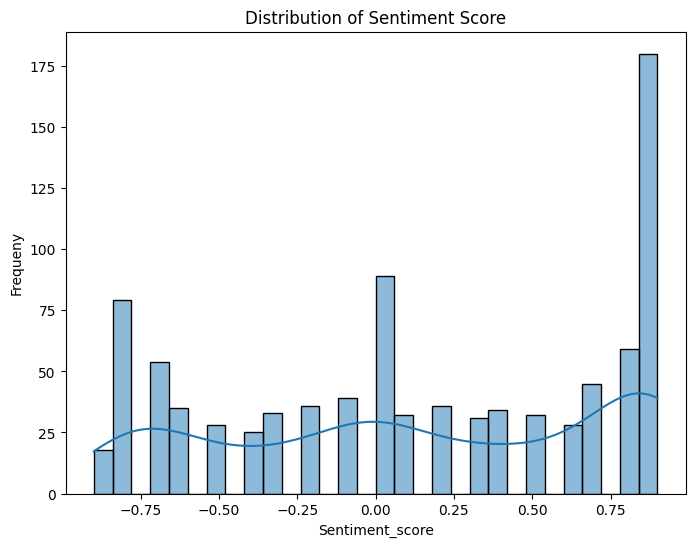

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Sentiment_score'],kde=True,bins=30)
plt.xlabel('Sentiment_score')
plt.ylabel('Frequeny')
plt.title('Distribution of Sentiment Score')
plt.show()

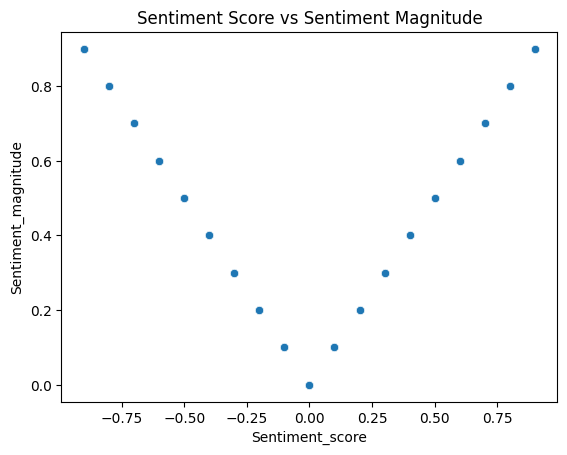

In [25]:
sns.scatterplot(x='Sentiment_score',y='Sentiment_magnitude',data=df)
plt.xlabel('Sentiment_score')
plt.ylabel('Sentiment_magnitude')
plt.title('Sentiment Score vs Sentiment Magnitude')
plt.show()

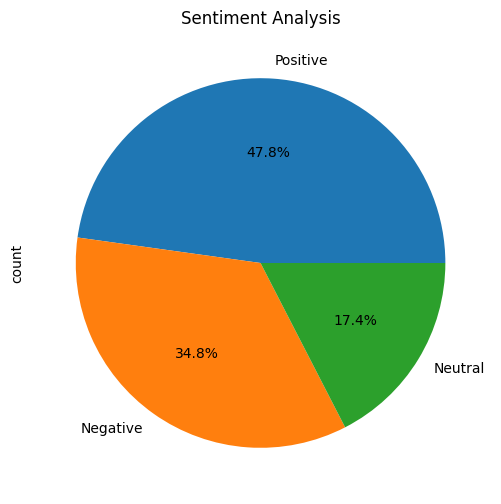

In [44]:
def sentiment_category(score):
  if score>0:
    return 'Positive'
  elif score<0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment_counts']=df['Sentiment_score'].apply(sentiment_category)
sentiment_counts=df['sentiment_counts'].value_counts()
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='pie',autopct='%1.1f%%')

plt.title('Sentiment Analysis')
plt.show()

In [42]:
sentiment_counts=df['sentiment_counts'].value_counts()
print(sentiment_counts)

sentiment_counts
Positive    477
Negative    347
Neutral     174
Name: count, dtype: int64


In [43]:
df

,id,cleaned_tweets,Sentiment_score,Sentiment_magnitude,sentiment_counts
0,1,user when a father is dysfunctional and is so ...,-0.9,0.9,Negative
1,2,user user thanks for lyft credit i cant use ca...,-0.8,0.8,Negative
2,3,bihday your majesty,0.0,0.0,Neutral
3,4,model i love u take with u all the time in ur,0.9,0.9,Positive
4,5,factsguide society now motivation,0.6,0.6,Positive
...,...,...,...,...,...
993,994,glad it all arrived safely user,0.9,0.9,Positive
994,995,who defines historically oppressed or historic...,0.0,0.0,Neutral
995,996,are you really or just pretending to be truths...,-0.3,0.3,Negative
996,997,i finally found a way how to delete old tweets...,0.7,0.7,Positive


AttributeError: 'Series' object has no attribute 'avg'